# Занятие 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 100
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([2, 6, 1, 6, 3, 5, 3, 2, 4, 6, 2, 4, 2, 5, 6, 1, 5, 3, 6, 6, 3, 6,
       5, 5, 3, 6, 6, 5, 4, 6, 3, 5, 2, 3, 6, 4, 6, 4, 1, 1, 4, 6, 1, 3,
       6, 5, 1, 1, 5, 1, 3, 6, 6, 3, 3, 5, 6, 3, 2, 3, 5, 6, 4, 4, 1, 5,
       3, 6, 5, 1, 3, 2, 2, 2, 4, 1, 3, 1, 5, 3, 6, 5, 3, 4, 2, 4, 4, 2,
       6, 2, 2, 3, 4, 5, 1, 4, 1, 2, 2, 6])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[14 15 19 14 16 22]
[0.14 0.15 0.19 0.14 0.16 0.22]
[1 2 3 4 5 6]
1.0000000000000002


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 3 4 5]
10: [0.3 0.2 0.3 0.1 0.1] 1.0
[1 2 3 4 5 6]
100: [0.18 0.14 0.14 0.16 0.14 0.24] 1.0
[1 2 3 4 5 6]
1000: [0.175 0.167 0.164 0.154 0.177 0.163] 1.0
[1 2 3 4 5 6]
10000: [0.1659 0.1736 0.1667 0.1669 0.1651 0.1618] 1.0
[1 2 3 4 5 6]
100000: [0.16962 0.16601 0.16492 0.16583 0.16498 0.16864] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(1000)
sample

array([ 1.67174328e+00,  7.36425002e-01,  1.55456872e+00, -2.29919933e-01,
        9.45481829e-01, -1.37351724e+00, -5.03886485e-01,  7.61630576e-01,
       -1.12549988e+00, -1.54674801e+00,  1.61209924e-01,  4.52922055e-01,
        7.78689617e-02,  3.33444491e-01, -3.35122243e-01,  2.72324197e-01,
        1.88233856e+00,  1.12431528e+00, -3.79021429e-01, -1.22566621e+00,
       -7.70925733e-02, -3.56952646e-01, -6.06821103e-01,  5.22614200e-01,
        6.39906149e-01,  1.21831616e+00,  7.72711405e-01,  2.19306886e+00,
       -9.71270243e-01, -1.68138434e+00,  1.10944617e+00,  3.22642247e-01,
       -7.06884823e-01,  9.72298317e-01, -1.02056297e+00, -6.15049365e-01,
       -1.22078243e+00, -1.10413323e+00, -3.93016700e-01, -1.12129870e+00,
        9.30066300e-01,  4.69165746e-01, -1.68177558e-01, -9.67002972e-01,
       -8.83525031e-01,  2.59930666e+00,  5.89141969e-01,  3.98256675e-01,
        1.01566466e+00, -1.66031135e+00, -1.87579215e+00, -5.18531318e-01,
       -6.21161277e-01, -

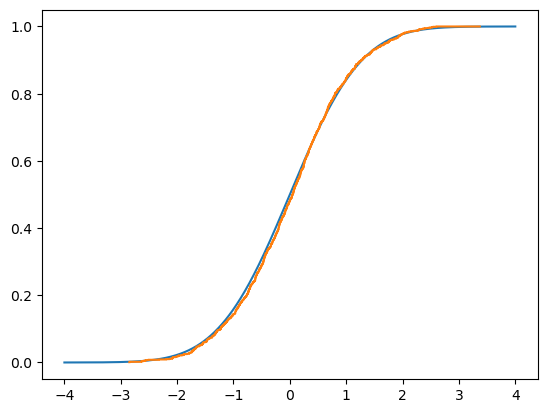

In [7]:
x = np.linspace(-4,4,1000)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[  8.  41.  95. 196. 255. 220. 116.  53.  15.   1.]


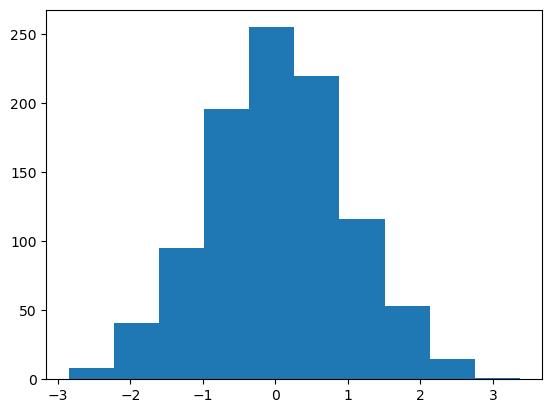

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample)
print(b)

In [9]:
n

array([-2.84853081, -2.22669397, -1.60485714, -0.9830203 , -0.36118347,
        0.26065337,  0.8824902 ,  1.50432704,  2.12616387,  2.74800071,
        3.36983754])

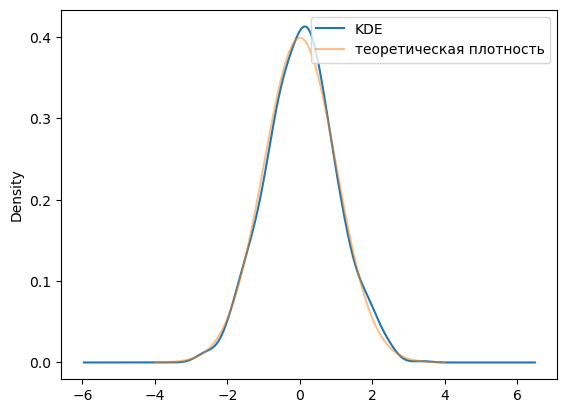

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 1.02034768e+00, -4.73283951e-01,  1.79216875e-03,  7.14187683e-01,
        1.05919321e+00,  3.41854632e-01,  9.16627190e-01,  6.77109738e-01,
       -1.28746240e+00, -8.20952384e-01, -6.68520038e-01,  4.18203459e-01,
       -4.54844864e-01, -8.35695985e-01,  1.02076177e+00, -2.37814236e+00,
       -4.38702979e-01,  8.69603210e-01,  1.18542647e+00,  2.14952159e+00,
        1.36980307e+00,  2.40569974e-01, -8.63761687e-01,  3.92280992e-03,
        5.37836336e-01, -1.40491922e+00, -1.65387306e-01,  4.17834276e-01,
        3.07162014e-01,  8.50673999e-01,  6.84668038e-01,  5.45184497e-01,
       -1.14828552e-01,  4.87913026e-01,  1.06307506e-01, -8.48199932e-02,
       -1.54297600e+00, -1.83734238e-01,  6.61947308e-02, -1.82870690e+00,
        1.21097872e-01,  1.12776858e+00, -5.89169901e-01, -1.42656507e+00,
       -1.71020838e+00, -1.77732776e+00, -1.37641257e+00, -1.15893263e+00,
        1.74705043e-01,  6.50123888e-01,  9.34535533e-01,  4.47673522e-01,
        2.06807773e-01, -

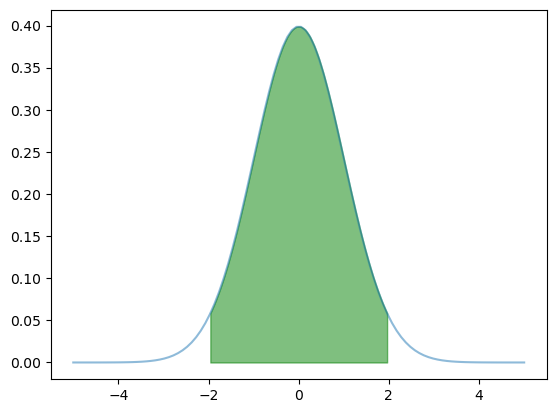

In [12]:
x = np.linspace(-5,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.pdf(0.25)

0.3866681168028493

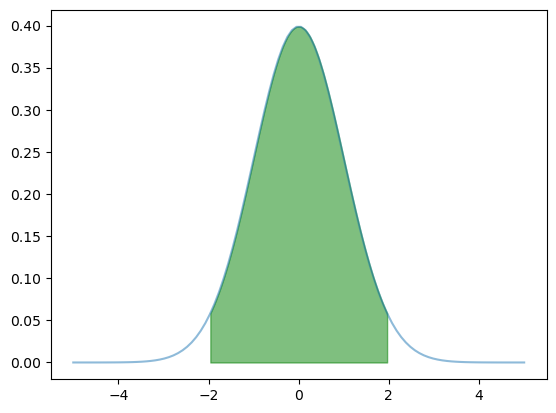

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Интервал для N 10 4.165 ... 15.322
Интервал для N 50 4.627 ... 9.616
Интервал для N 100 4.736 ... 8.264
Интервал для N 1000 4.917 ... 6.032
Интервал для N 10000 4.974 ... 5.326


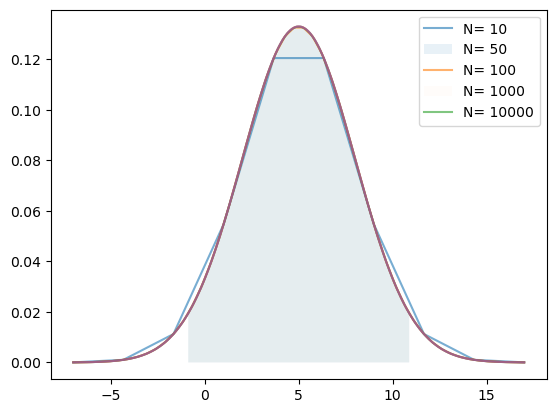

In [16]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 3
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 1000, 10000]
#colors = ['cyan', "purple", "orange", "yellow"]
for n in N:
    sample = np.linspace(-7, 17, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = .6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print ("Интервал для N %.f %.3f ... %.3f" % (n, sample.mean() + q_a_m * sigma/np.sqrt(n) ,#!!! + т.к. q_a_m отрицательное
                                                sample.mean() + q_a_p * sigma/np.sqrt(n)))

Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

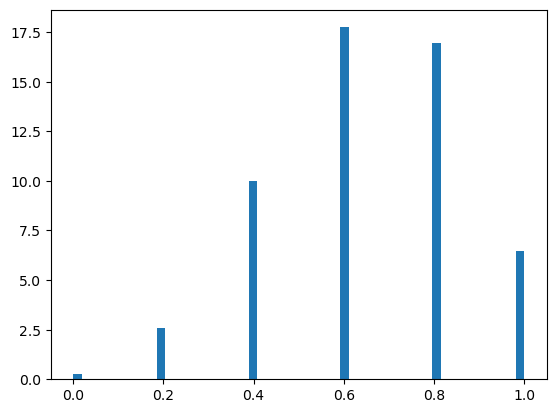

In [17]:
p=.65
ber_rv = sts.bernoulli(p)
ber_rv.rvs(20)
N = 5
NN = 10000
# сгенерируем много выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(ber_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');

In [18]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([1.51968635, 1.22922069, 2.0419051 , 1.13916809, 1.90827869,
       2.20512212, 2.74146487, 1.72965893, 3.52751227, 2.14147909])

In [19]:
N = 2
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.05758171, 0.19577781, 0.1785033 , 0.32245757, 0.3742811 ,
        0.44913732, 0.48368635, 0.57005891, 0.67370599, 0.58157525,
        0.59309159, 0.44337915, 0.35124842, 0.24184317, 0.1381961 ,
        0.10364707]),
 array([1.07777512, 1.25144138, 1.42510764, 1.5987739 , 1.77244016,
        1.94610642, 2.11977269, 2.29343895, 2.46710521, 2.64077147,
        2.81443773, 2.98810399, 3.16177026, 3.33543652, 3.50910278,
        3.68276904, 3.8564353 ]),
 <BarContainer object of 16 artists>)

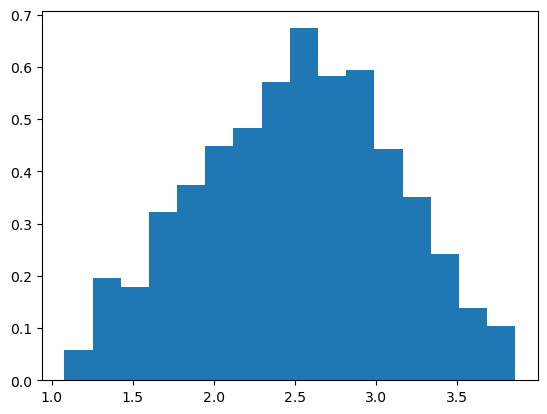

In [20]:
plt.hist(means, density=True, bins='auto')

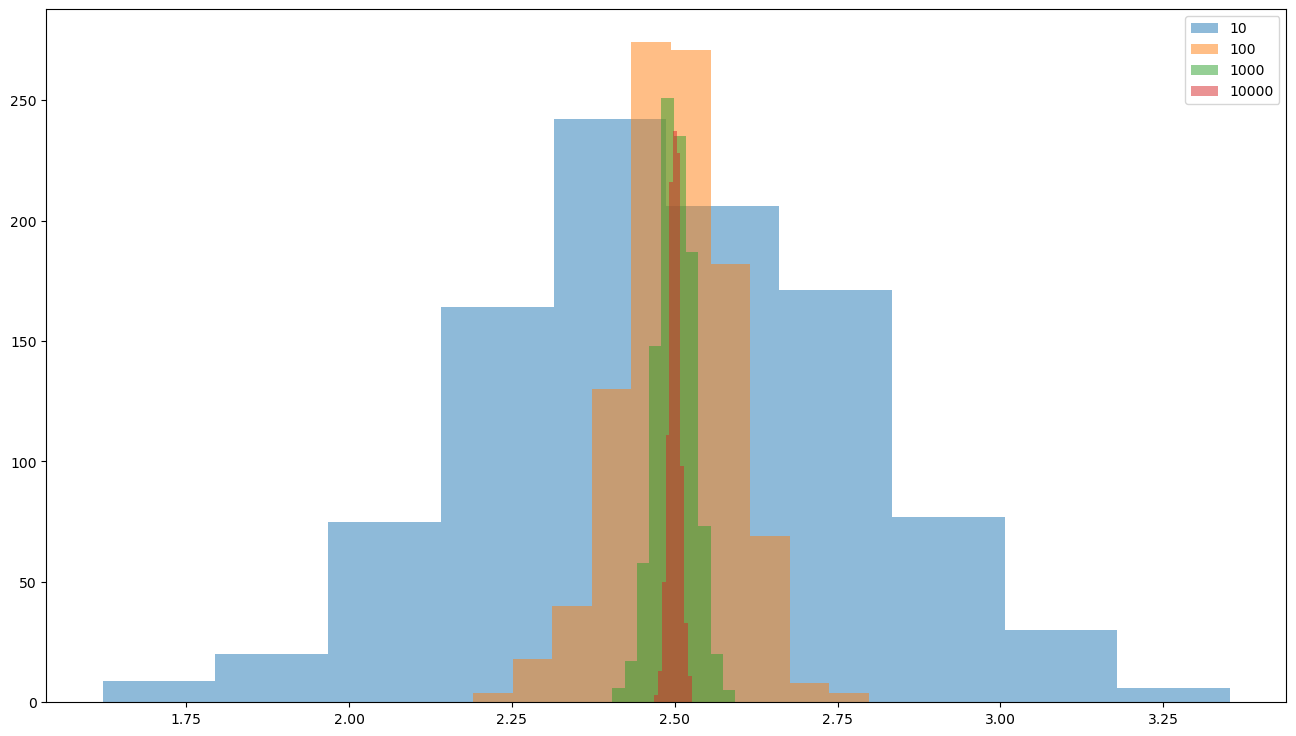

In [21]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [22]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [23]:
uniform_rv.mean()

2.5

In [24]:
uniform_rv.var()

0.75

In [25]:
uniform_rv.std()

0.8660254037844386

[]

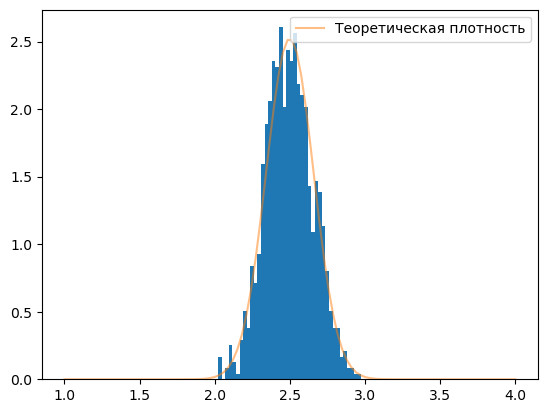

In [26]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [27]:
data = uniform_rv.rvs(N)

In [28]:
#data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.std(data, ddof=1)/ np.sqrt(N), np.mean(data) + 1.96 * np.std(data, ddof=1)/ np.sqrt(N) 
)) #uniform_rv.std()
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data), 
                      scale= np.std(data, ddof=1)/ np.sqrt(N))# alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data), std_mean=np.std(data, ddof=1)/np.sqrt(N), alpha=0.05, alternative='2s')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.143986813594407, 2.761186728208804] 
Доверительный интервал для среднего по цпт интервальная оценка: (2.1439924841910405, 2.7611810576121703) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.1439924841910405, 2.7611810576121703) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [29]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([13,  7, 11,  7, 10,  7, 12,  7, 12,  8])

Text(0.5, 0, '$x$')

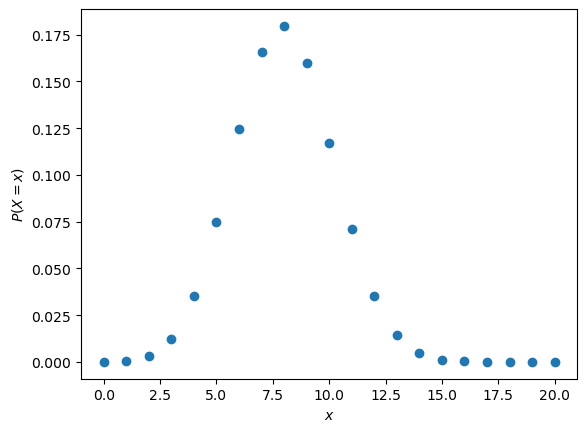

In [30]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

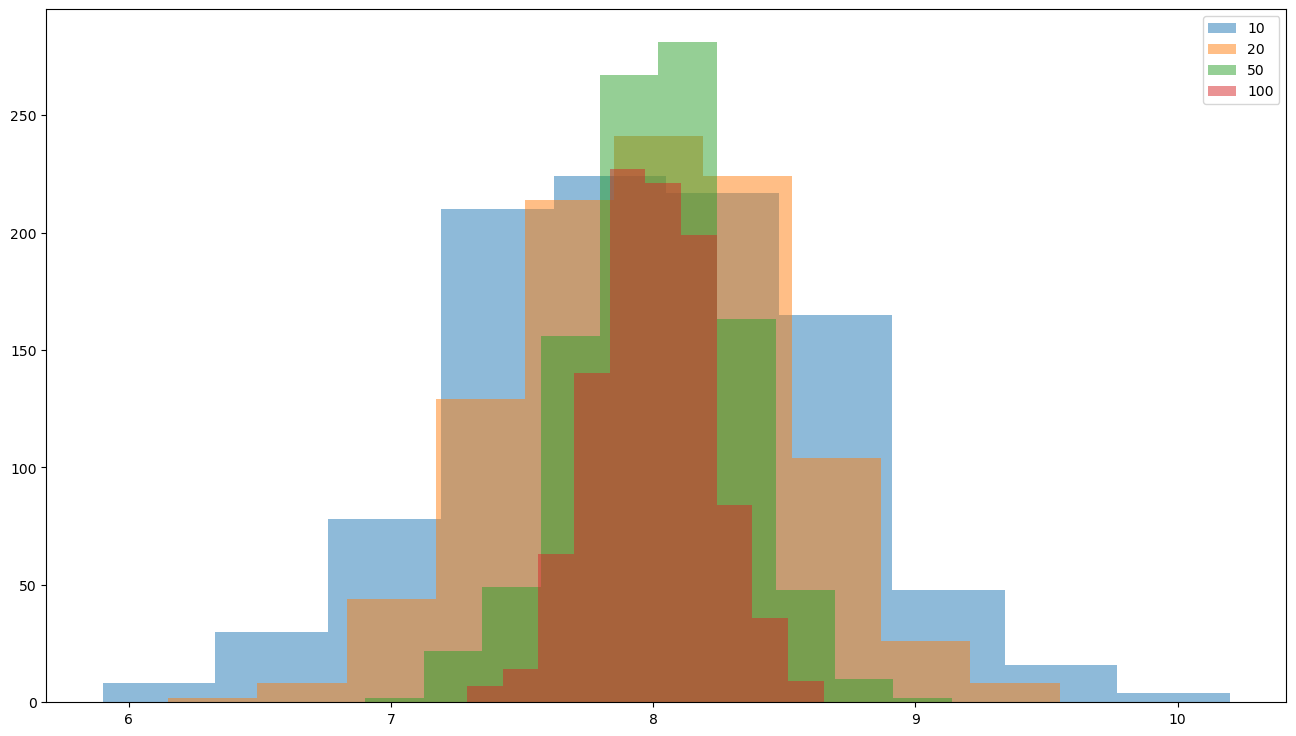

In [31]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [32]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(100)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

Text(0.5, 0, '$x$')

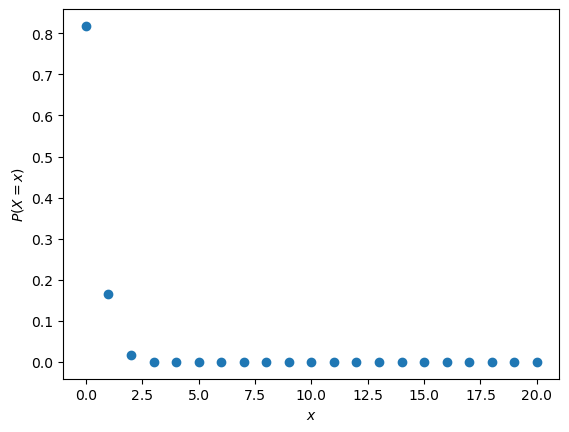

In [33]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

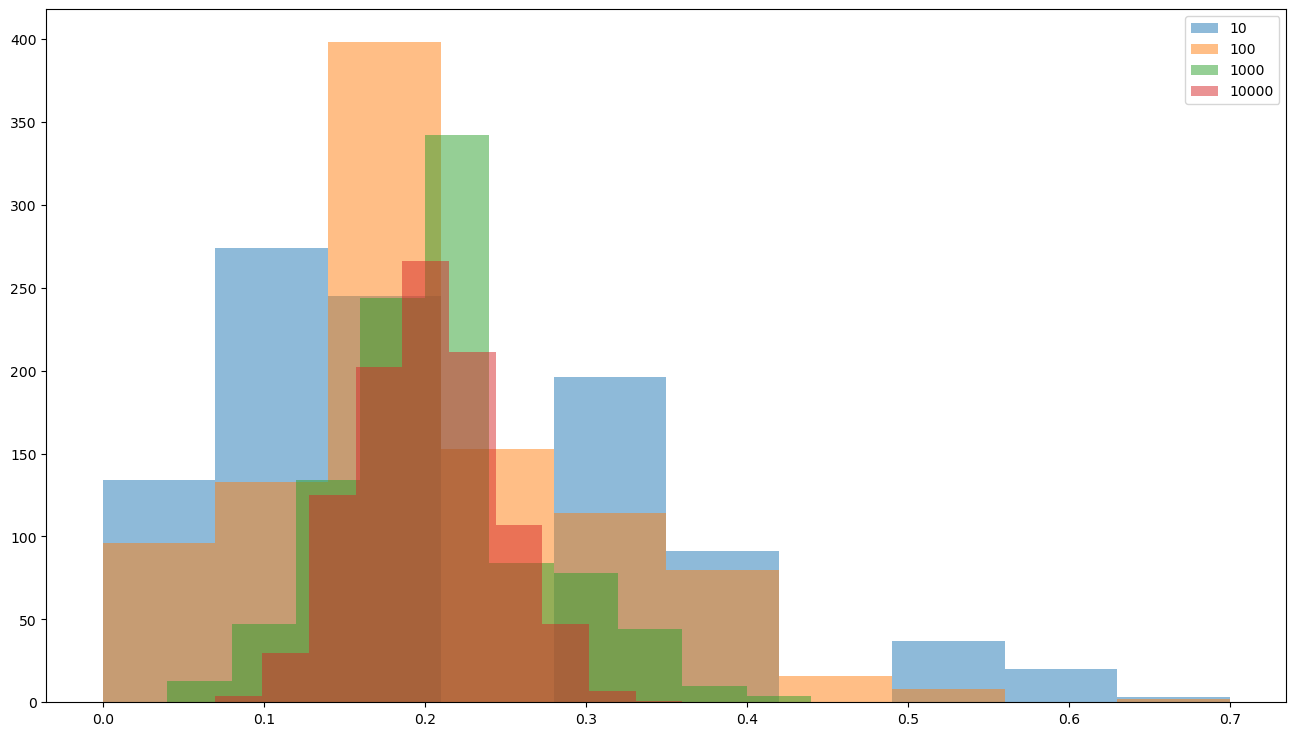

In [34]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()